In [1]:
# Import relevant modules
from rsqsim_api.catalogue.catalogue import RsqSimCatalogue
from rsqsim_api.fault.multifault import RsqSimMultiFault
import fnmatch
import os
import numpy as np

# # Tell python where field paths etc are relative to
script_dir = os.path.abspath('')
fault_dir = "../../../data/shaw2021/rundir5091"
catalogue_dir = fault_dir


Read in faults and earthquake catalogue.  The files are quite large and can be downloaded from https://doi.org/10.5281/zenodo.5534462

In [2]:
fault_model = RsqSimMultiFault.read_fault_file_bruce(os.path.join(script_dir, fault_dir, "zfault_Deepen.in"),
                                                     os.path.join(script_dir, fault_dir, "znames_Deepen.in"),
                                                     transform_from_utm=True)
whole_catalogue = RsqSimCatalogue.from_catalogue_file_and_lists(os.path.join(catalogue_dir, "eqs..out"),
                                                                list_file_directory=catalogue_dir, list_file_prefix="catalog")

Identify faults of interest and select events rupturing these faults.

In [16]:
#e.g. hope fault segments
faults2select = [name for name in fault_model.names if fnmatch.fnmatch(name, "hik*")]
#fault_selection=RsqSimMultiFault([fault_model.name_dic[faults2select[i]] for i in range(0,len(faults2select))])
fault_selection=RsqSimMultiFault([fault_model.name_dic[name] for name in faults2select])

Find events on these faults.

In [17]:
events_on_fault=whole_catalogue.filter_by_fault(fault_selection, minimum_patches_per_fault=1)

Divide events into magnitude units.

In [18]:
# would be better to make a structure (dict?) to have the separate magnitude bins rather than separate entities
events526=events_on_fault.filter_whole_catalogue(min_mw=5,max_mw=6)
events627=events_on_fault.filter_whole_catalogue(min_mw=6,max_mw=7)
events728=events_on_fault.filter_whole_catalogue(min_mw=7,max_mw=8)

In [19]:
# find slip on same patches + add up in each magnitude bin
for evlist in events526,events627,events728:
    #make dictionary of patchnumber: accumulated slip for a given catalogue
    evlist.assign_accumulated_slip()


#want to be able to do plotting of catalogue not only events - copy plotslip2d to catalogue and change section with patch numbers to accumulated slip

/file/UsersC/cpe88/Home/PycharmProjects/rsqsim-python-tools/src/rsqsim_api/rsqsim_api/visualisation/utilities.py:79: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  poly_ls += list(item)
/file/UsersC/cpe88/Home/PycharmProjects/rsqsim-python-tools/src/rsqsim_api/rsqsim_api/visualisation/utilities.py:79: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  poly_ls += list(item)


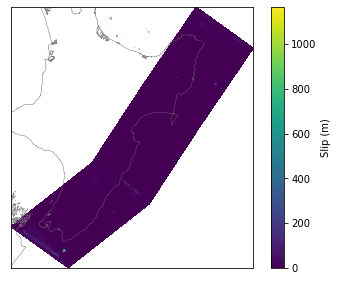

/file/UsersC/cpe88/Home/PycharmProjects/rsqsim-python-tools/src/rsqsim_api/rsqsim_api/visualisation/utilities.py:79: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  poly_ls += list(item)
/file/UsersC/cpe88/Home/PycharmProjects/rsqsim-python-tools/src/rsqsim_api/rsqsim_api/visualisation/utilities.py:79: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  poly_ls += list(item)


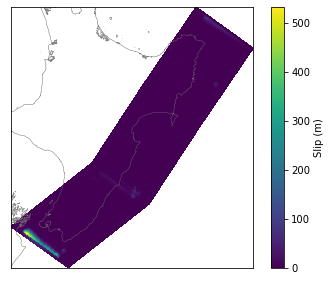

/file/UsersC/cpe88/Home/PycharmProjects/rsqsim-python-tools/src/rsqsim_api/rsqsim_api/visualisation/utilities.py:79: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  poly_ls += list(item)
/file/UsersC/cpe88/Home/PycharmProjects/rsqsim-python-tools/src/rsqsim_api/rsqsim_api/visualisation/utilities.py:79: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  poly_ls += list(item)


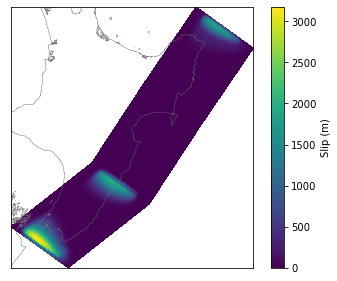

In [20]:
#plot an event 
fault_selection=RsqSimMultiFault([fault_model.name_dic[name] for name in faults2select])
events526.plot_accumulated_slip_2d(fault_model=fault_selection,write="evTest.png",bounds=fault_selection.bounds)
events627.plot_accumulated_slip_2d(fault_model=fault_selection,write="evTest.png",bounds=fault_selection.bounds)
events728.plot_accumulated_slip_2d(fault_model=fault_selection,write="evTest.png",bounds=fault_selection.bounds)

In [11]:
print(faults2select)
[name for name in fault_model.names if fnmatch.fnmatch(name, "hik*")]

["hope1888ss']", "hopeconwayss']", "hopeconwayosss']", "hopecwss']", "hopetarass']", "hopeterapa1n2rs']"]


["hikhbaymaxif']", "hikraukmaxif']", "hikwgtnmaxif']"]

In [9]:
fault_selection.bounds


array([1474395.7499744 , 5264996.41213425, 1755829.98297335,
       5361906.55410689])